In [142]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [182]:
# Loading the ipl macthes dataset
ipl= pd.read_csv("C:\\Users\\imad shingeti\\Downloads\\ipl.csv")
teamwise_home_and_away=pd.read_csv("C:\\Users\\imad shingeti\\Downloads\\teamwise_home_and_away.csv")
deliveries=pd.read_csv('C:\\Users\\imad shingeti\\Downloads\\deliveries.csv\\deliveries.csv')




In [94]:
# Having a glance of first 5 records of the dataset
ipl.head()


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [183]:
ipl.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [184]:
# Looking at the number of rows and column in the dataset
ipl.shape



(756, 18)

In [185]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [186]:
ipl.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [187]:
# Getting the frequency of most man of the match awards
ipl['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

In [188]:
# Getting top 10 players with most man of the match awards
(ipl['player_of_match'].value_counts()[0:10])

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

Text(0.5, 0, 'Players')

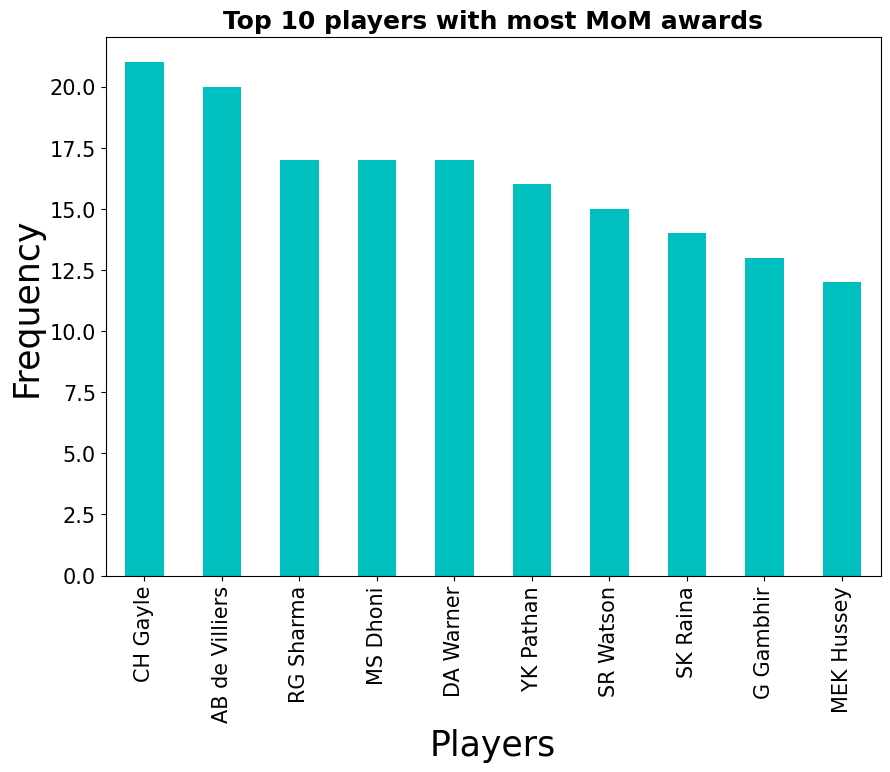

In [189]:
# Making a bar plot for the top 10 players with most man of the match awards
ipl['player_of_match'].value_counts().head(10).plot(kind = 'bar',figsize=(10,7), fontsize=15, color='c')
plt.title("Top 10 players with most MoM awards",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Players", size = 25)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

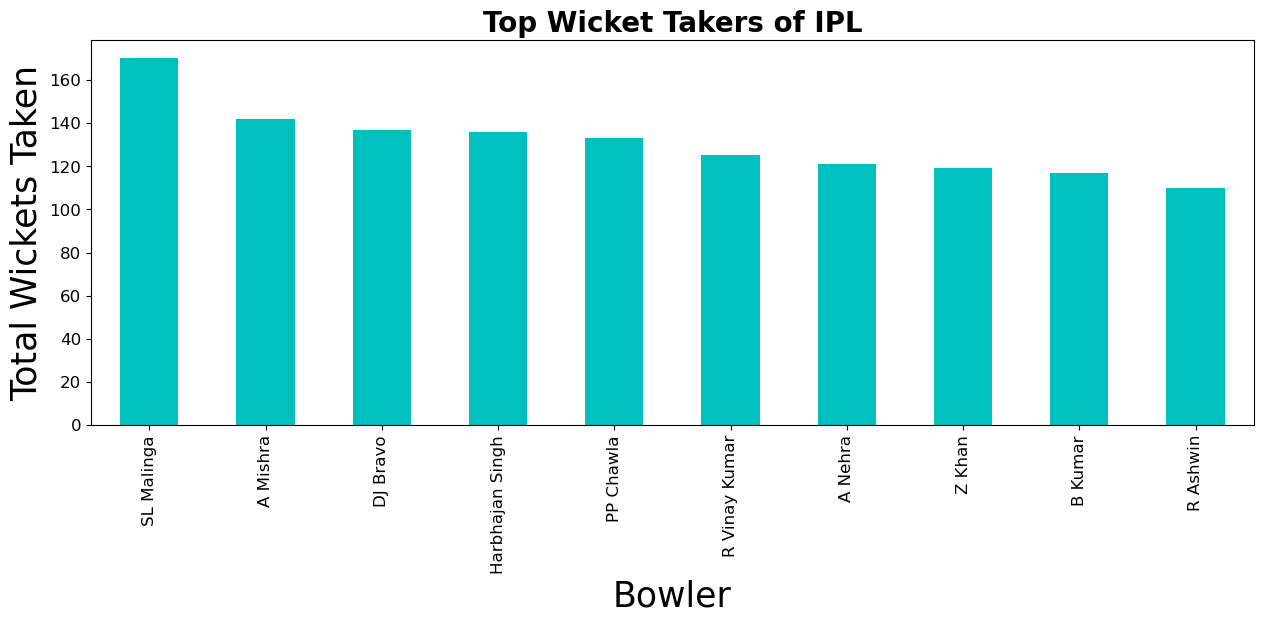

In [160]:
merge_data.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'c', figsize = (15,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

In [101]:
# Getting the frequency of result column
ipl['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [190]:
# Finding the number of toss wins w.r.t. each team
ipl['toss_winner'].value_counts()

MI                98
KKR               92
CSK               89
RCB               81
KXIP              81
DD                80
RR                80
SRH               46
DC                43
PW                20
GL                15
RPS               13
Delhi Capitals    10
KTK                8
Name: toss_winner, dtype: int64

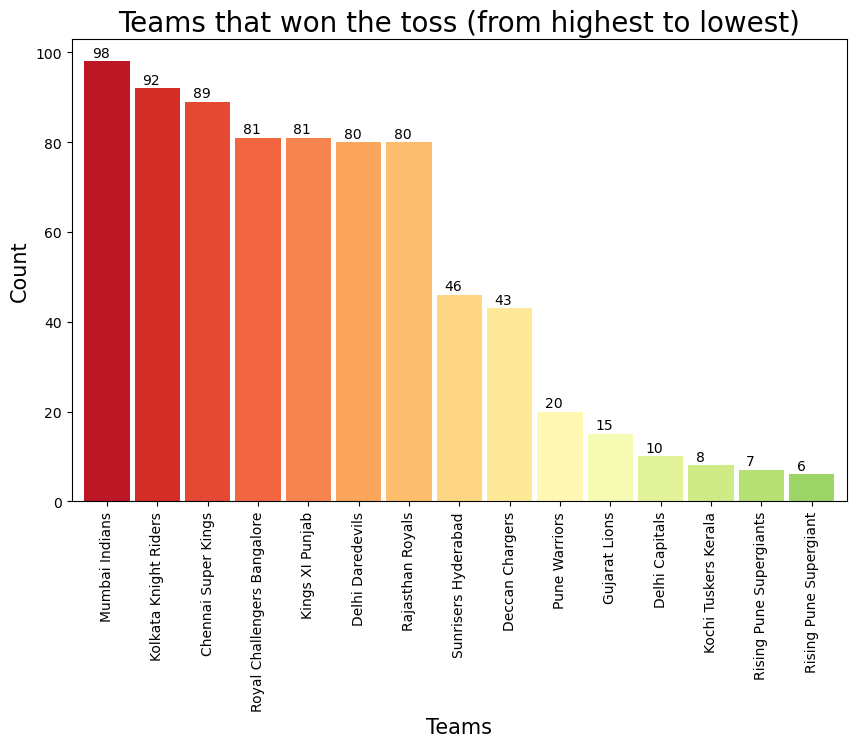

In [103]:
plt.subplots(figsize=(10,6))
ax=ipl['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title("Teams that won the toss (from highest to lowest)", fontsize=20)
plt.xlabel("Teams", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

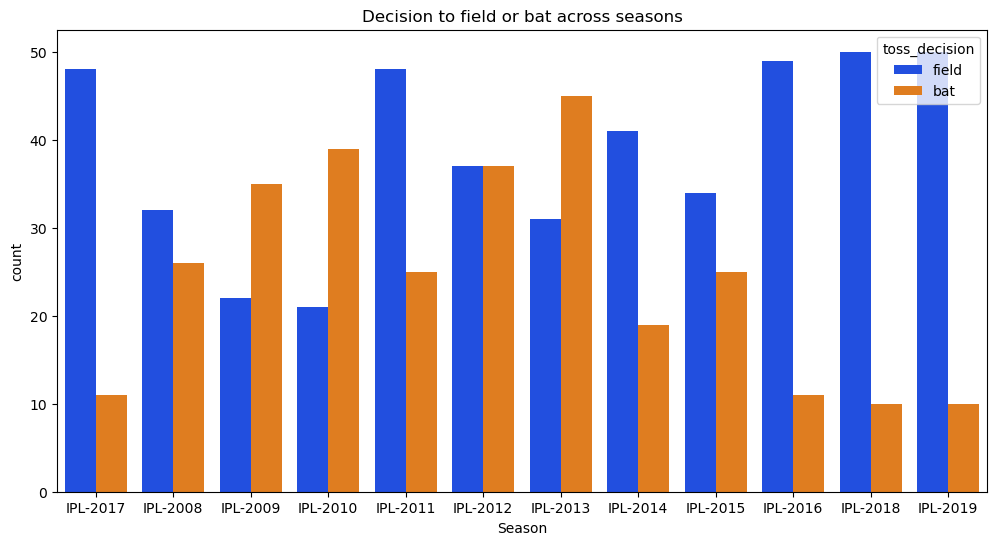

In [105]:
plt.subplots(figsize=(12,6))
sns.countplot(x='Season',hue='toss_decision',data=ipl ,palette=sns.color_palette('bright'))
plt.title("Decision to field or bat across seasons")
plt.show()

In [106]:
# Extracting the records where a team won batting first
batting_first=ipl[ipl['win_by_runs']!=0]

In [107]:
batting_first.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,IPL-2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,IPL-2017,Delhi,15-04-2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


In [109]:
# Finding out the number of wins w.r.t. each team after batting first
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

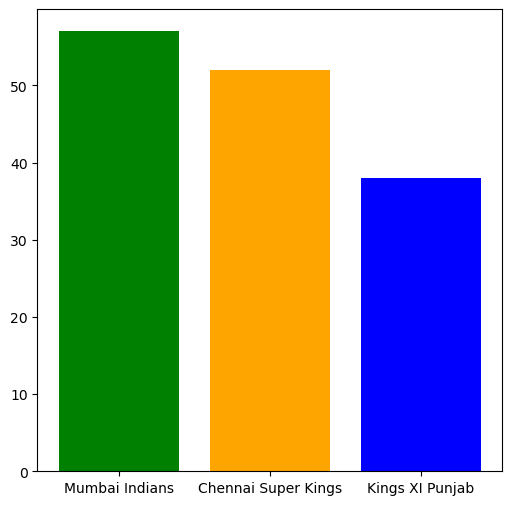

In [110]:
# Making a bar plot for top 3 teams with most wins after batting first
plt.figure(figsize=(6,6))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()),list(batting_first['winner'].value_counts()[0:3]),color=['green','orange','blue'])
plt.show()

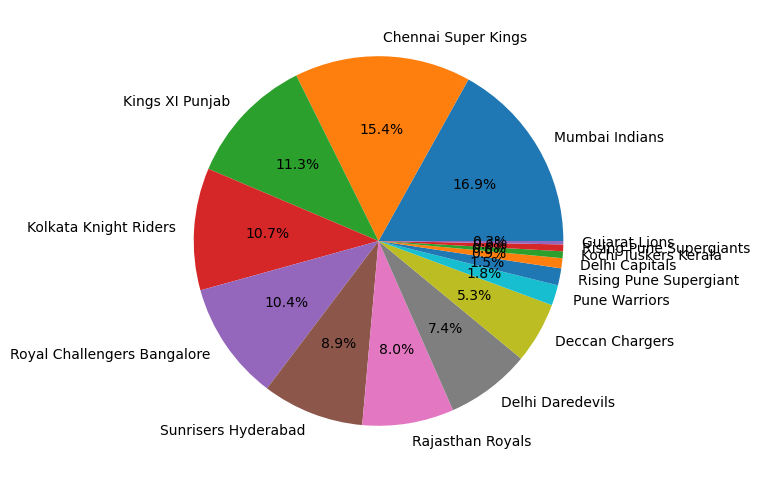

In [111]:
# Making a Pie Chart for top 3 teams with most wins after batting first
plt.figure(figsize=(6,6))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [112]:
# Extracting those records where a team has won after batting second
batting_second=ipl[ipl['win_by_wickets']!=0]
batting_second

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,11346,IPL-2019,Mohali,05-05-2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


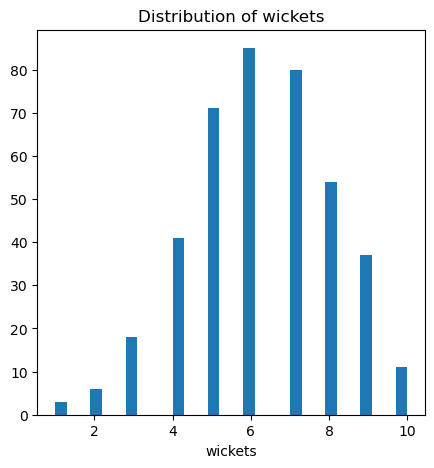

In [113]:
# Making a histogram for frequency of wins w.r.t. number of wickets
plt.figure(figsize=(5,5))
plt.hist(batting_second['win_by_wickets'] ,bins=30)
plt.title("Distribution of wickets")
plt.xlabel("wickets")
plt.show()

In [114]:
# Fnding out the frequency of number of wins w.r.t. each time after batting second
batting_second['winner'].value_counts() 

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

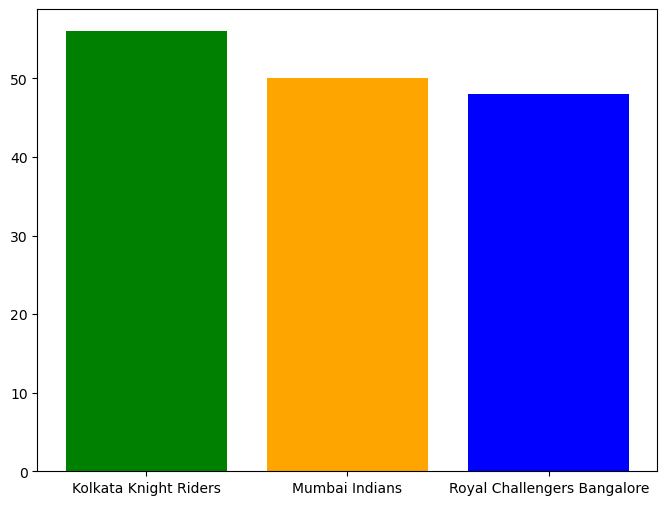

In [115]:
# Making a bar plot for top 3 teams with most wins after batting second
plt.figure(figsize=(8,6))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()),list(batting_second['winner'].value_counts()[0:3]),color=['green','orange','blue'])
plt.show()

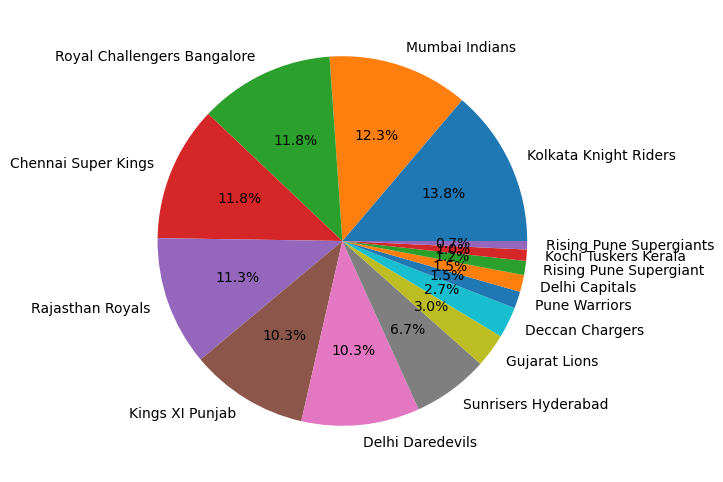

In [116]:
# Making a pie chart for distribution of most wins after batting second
plt.figure(figsize=(6,6))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [119]:
# Looking at the number of matches played each season
ipl['Season'].value_counts()

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2010    60
IPL-2014    60
IPL-2016    60
IPL-2018    60
IPL-2019    60
IPL-2017    59
IPL-2015    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

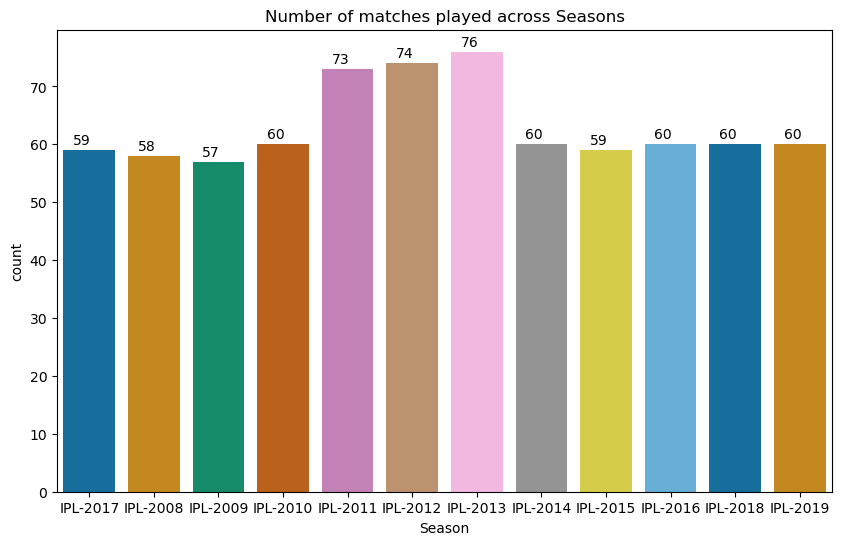

In [121]:
plt.subplots(figsize=(10,6))
ax = sns.countplot(x='Season',data=ipl,palette=sns.color_palette('colorblind')) 
#countplot automatically counts the frequency of an item
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title("Number of matches played across Seasons")
plt.show()

In [122]:
print("Total number of Cities played: ",ipl['city'].nunique())
print("Total number of Venues played: ",ipl['venue'].nunique())

Total number of Cities played:  32
Total number of Venues played:  41


In [123]:
# Looking at the number of matches played in each city
ipl['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

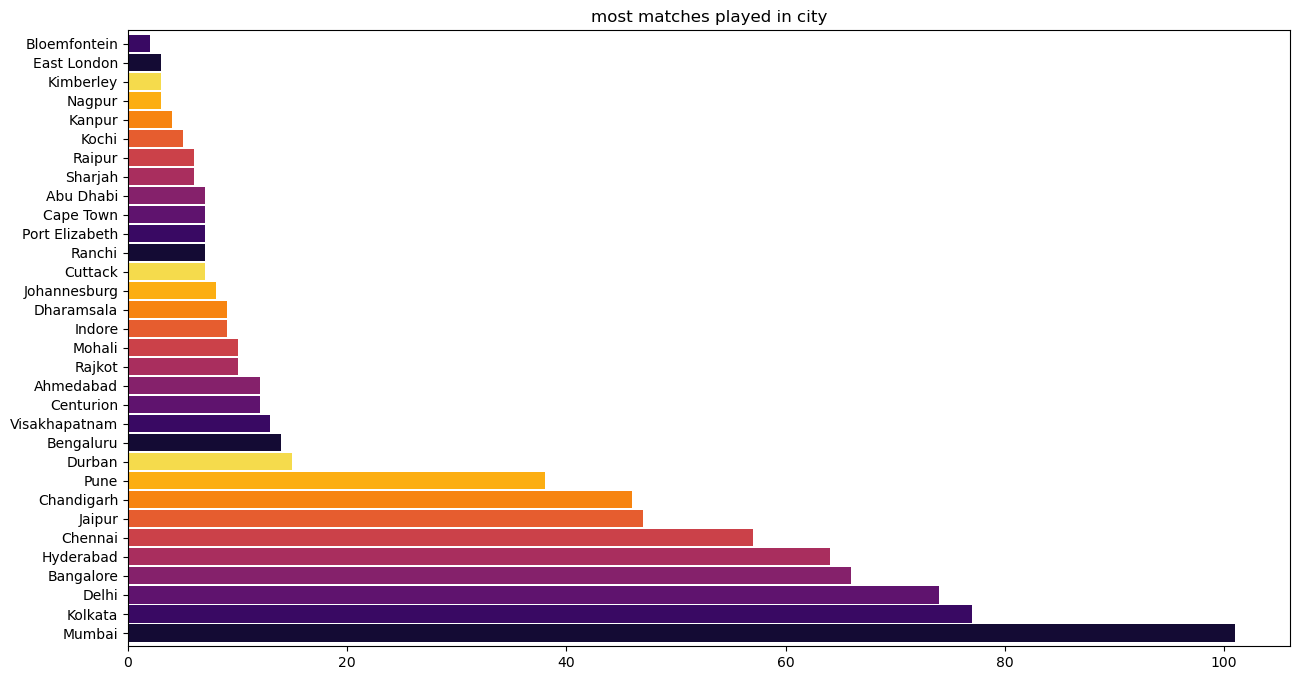

In [124]:
# In which city most ipl matches played ?
ipl['city'].value_counts().plot(kind='barh',width=.9,figsize=(15,8),color=sns.color_palette('inferno',10))

plt.title('most matches played in city')
plt.show()

In [125]:
# Looking at the number of matches played in each city
ipl['venue'].value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

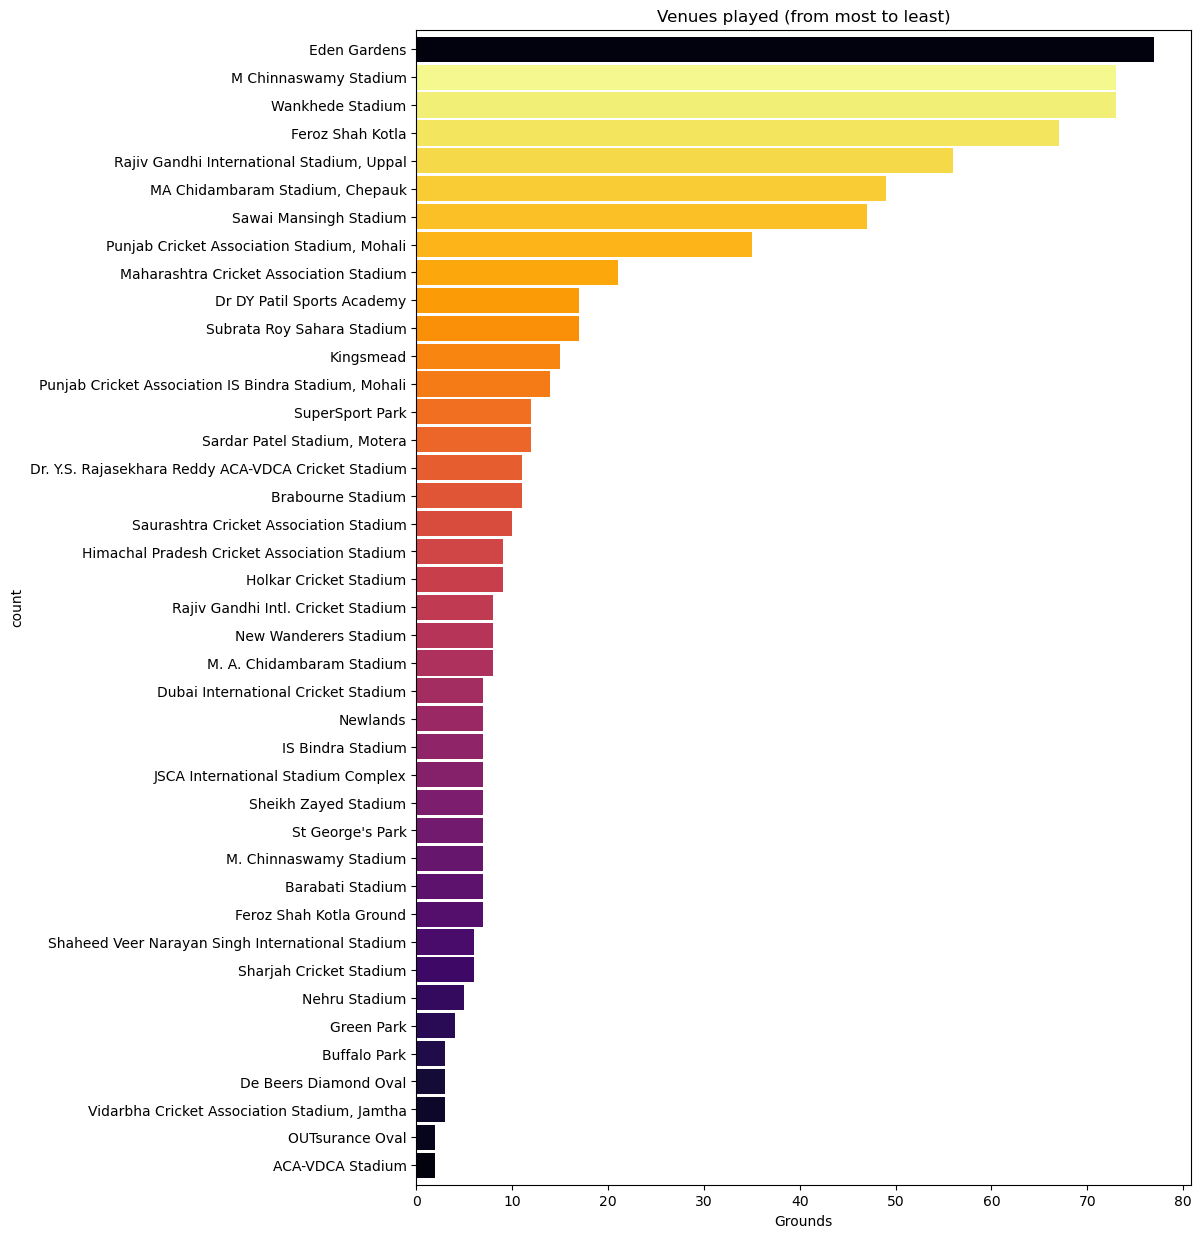

In [126]:
plt.subplots(figsize=(10,15))
ax = ipl['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('inferno',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.title("Venues played (from most to least)")
plt.show()

In [127]:
# Finding out how many times a team has won the match after winning the loss
np.sum(ipl['toss_winner']==ipl['winner'])

393

In [128]:
## Total number of matches won in ipl   
ipl['winner'].count()


752

In [129]:
290/573


0.506108202443281

In [130]:
not_same = ipl[ipl['toss_winner'] != ipl['winner']]
same = ipl[ipl['toss_winner'] == ipl['winner']]
print("Percentage of matches where toss winner is not same as winner: ",round(not_same.shape[0]/ipl.shape[0],2) *100)
print("Percentage of matches where toss winner is same as winner: ", round(same.shape[0]/ipl.shape[0],2) * 100)
toss_winner = pd.DataFrame({'result':['Yes','No'],'per':[same.shape[0], not_same.shape[0]] })
fig = px.pie(toss_winner, values='per', names='result', color='result', title='Is Match winner same as toss winner?')
# fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Percentage of matches where toss winner is not same as winner:  48.0
Percentage of matches where toss winner is same as winner:  52.0


# Teamwise_home_and_away

In [136]:
teamwise_home_and_away

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,RPS,5,5,8,8,62.500000,62.500000
1,MI,58,51,101,86,57.425743,59.302326
2,CSK,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,SRH,30,28,63,45,47.619048,62.222222
5,RR,29,46,67,80,43.283582,57.500000
6,DC,18,11,43,32,41.860465,34.375000
7,KXIP,38,44,91,85,41.758242,51.764706
8,RCB,35,49,85,95,41.176471,51.578947
9,KKR,34,58,83,95,40.963855,61.052632


In [137]:
teamwise_home_and_away.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)
print(teamwise_home_and_away.info())
teamwise_home_and_away.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes
None


,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,RPS,5,5,8,8,62.500000,62.500000
1,MI,58,51,101,86,57.425743,59.302326
2,CSK,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,SRH,30,28,63,45,47.619048,62.222222


In [138]:
teamwise_home_and_away['Win_per'] = (teamwise_home_and_away['home_wins'] + teamwise_home_and_away['away_wins'])/(teamwise_home_and_away['home_matches']+teamwise_home_and_away['away_matches'])*100
teamwise_home_and_away

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage,Win_per
0,RPS,5,5,8,8,62.500000,62.500000,62.500000
1,MI,58,51,101,86,57.425743,59.302326,58.288770
2,CSK,51,49,89,75,57.303371,65.333333,60.975610
3,Delhi Capitals,3,7,6,10,50.000000,70.000000,62.500000
4,SRH,30,28,63,45,47.619048,62.222222,53.703704
5,RR,29,46,67,80,43.283582,57.500000,51.020408
6,DC,18,11,43,32,41.860465,34.375000,38.666667
7,KXIP,38,44,91,85,41.758242,51.764706,46.590909
8,RCB,35,49,85,95,41.176471,51.578947,46.666667
9,KKR,34,58,83,95,40.963855,61.052632,51.685393


In [139]:
teamwise_home_and_away.sort_values('Win_per',inplace=True,ascending=False)

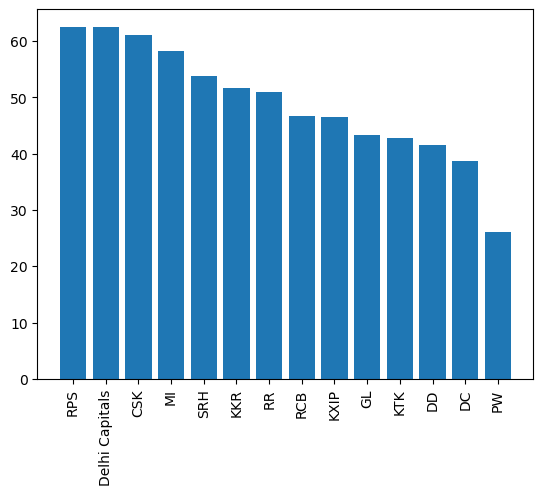

In [140]:
plt.bar(teamwise_home_and_away['team'],teamwise_home_and_away['Win_per'])
plt.xticks(rotation=90)
plt.show()

In [143]:
fig = go.Figure(data=[
    go.Bar(name='Home Win', x=teamwise_home_and_away['team'], y=teamwise_home_and_away['home_win_percentage']),
    go.Bar(name='Away Win', x=teamwise_home_and_away['team'], y=teamwise_home_and_away['away_win_percentage'])
])

fig.update_layout(barmode='group',title="Team wise - Home/Away wins")
fig.show()

In [144]:
most_runs_average_strikerate=pd.read_csv("C:\\Users\\imad shingeti\\Downloads\\most_runs_average_strikerate.csv")

In [145]:
most_runs_average_strikerate.info()
most_runs_average_strikerate.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
7,RV Uthappa,4420,156,3381,28.333333,130.730553
8,AB de Villiers,4414,104,2902,42.442308,152.101999
9,G Gambhir,4219,134,3400,31.485075,124.088235


In [148]:
top_ten = most_runs_average_strikerate.head(10)
top_ten

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
7,RV Uthappa,4420,156,3381,28.333333,130.730553
8,AB de Villiers,4414,104,2902,42.442308,152.101999
9,G Gambhir,4219,134,3400,31.485075,124.088235


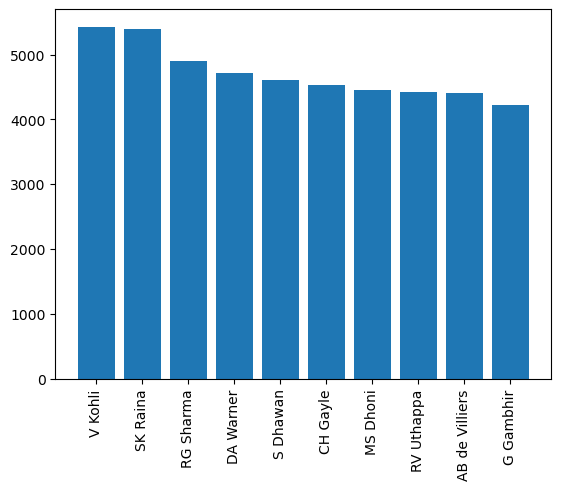

In [149]:
plt.bar('batsman','total_runs',data = top_ten)
plt.xticks(rotation=90)
plt.show()

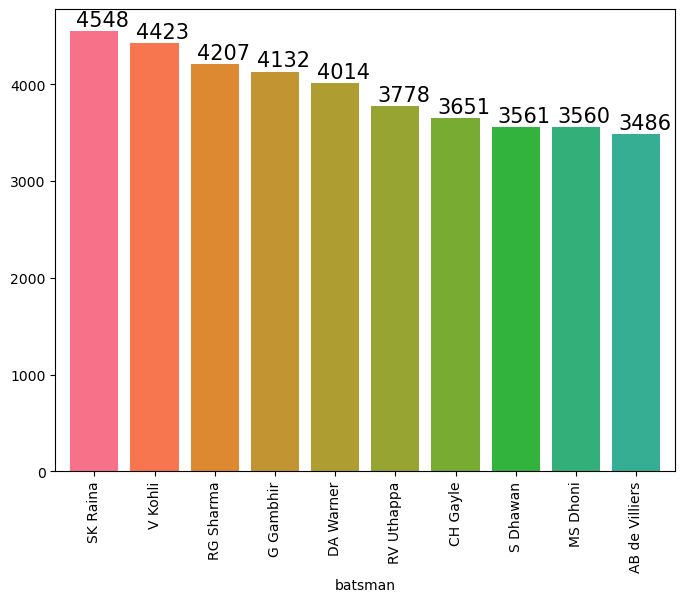

In [150]:
plt.subplots(figsize=(8,6))
b = deliveries.groupby(['batsman'])['batsman_runs'].sum()#.sort_values('batsman_runs')
b = b.sort_values(ascending=False)
b[100:200]

ax=b.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('husl',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=15)
plt.show()

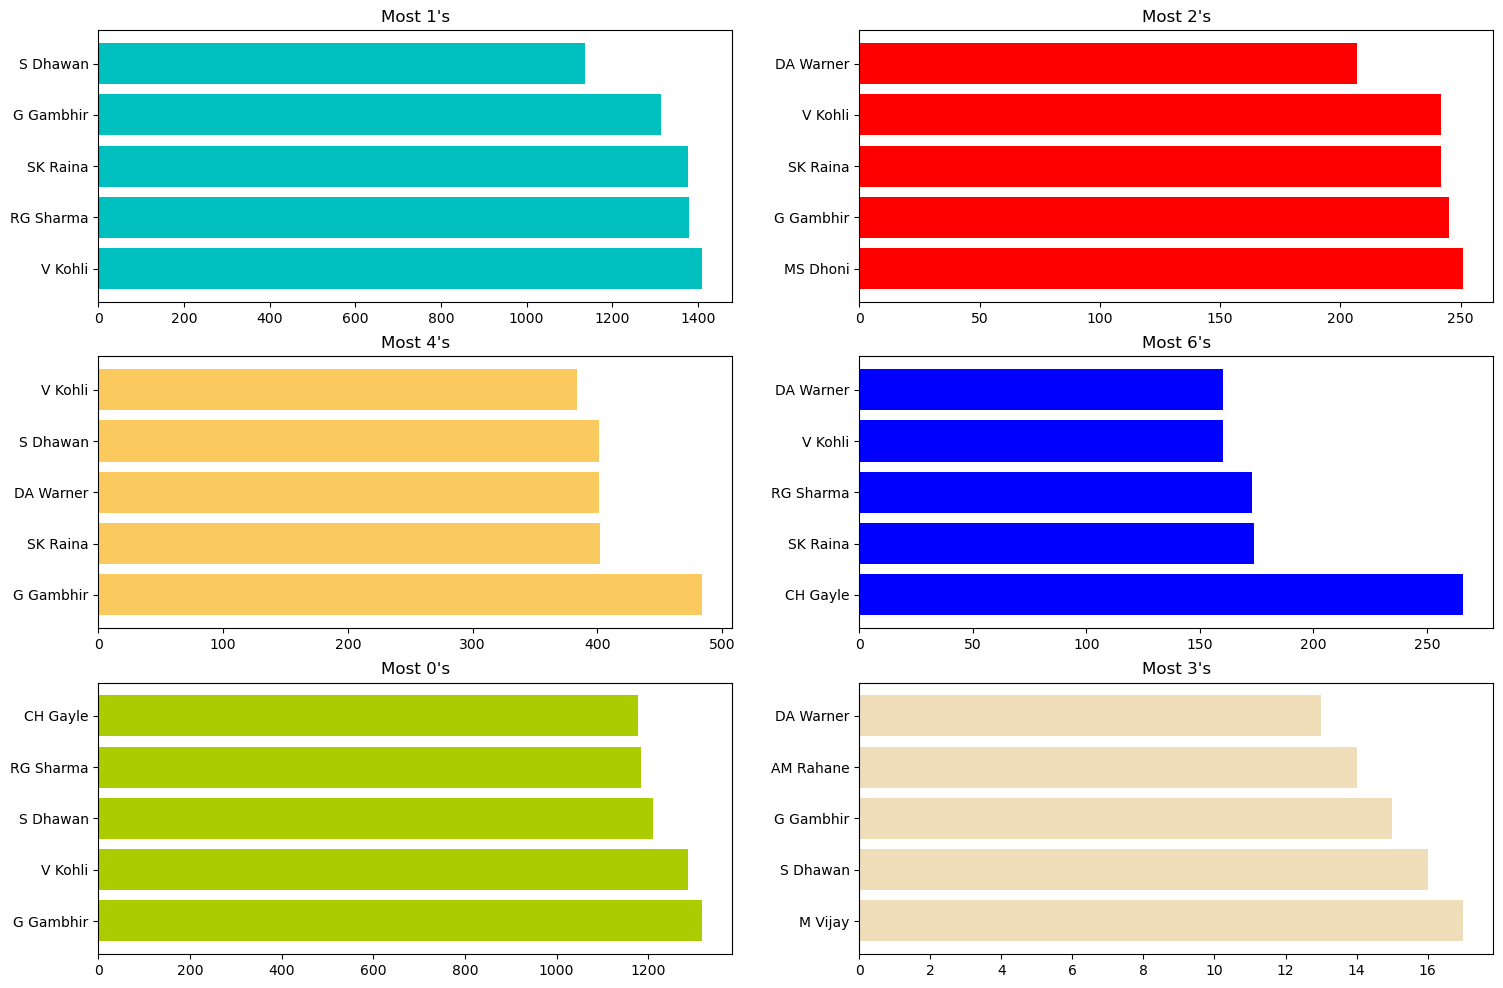

In [153]:
top_batsman = deliveries.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
top_batsman = top_batsman.pivot('batsman','batsman_runs','total_runs')

fig,ax=plt.subplots(3,2,figsize=(18,12))
top_batsman[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='c',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
top_batsman[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='r',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
top_batsman[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
top_batsman[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='b',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')
top_batsman[0].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[2,0],color='#abcd00',width=0.8)
ax[2,0].set_title("Most 0's")
ax[2,0].set_ylabel('')
top_batsman[3].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[2,1],color='#f0debb',width=0.8)
ax[2,1].set_title("Most 3's")
ax[2,1].set_ylabel('')
plt.show()

In [154]:
high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#reset_index() converts the obtained series into a dataframe
high_scores=high_scores[high_scores['total_runs']>=200]
#nlargest is used to sort the given column
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
522,259,1,Delhi Daredevils,Kings XI Punjab,231
981,486,1,Kings XI Punjab,Chennai Super Kings,231
100,50,1,Kings XI Punjab,Mumbai Indians,230
1170,580,1,Royal Challengers Bangalore,Sunrisers Hyderabad,227


# Deliveries

In [31]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [33]:
match1= deliveries[deliveries['match_id']==1]

In [34]:
match1


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,6,YS Chahal,A Choudhary,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
244,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,1,YS Chahal,A Choudhary,BCJ Cutting,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
245,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,YS Chahal,A Choudhary,BCJ Cutting,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
246,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,A Choudhary,YS Chahal,BCJ Cutting,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [35]:
match1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [36]:
match1.shape

(248, 21)

In [37]:
srh=match1[match1['inning']==1]
srh

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,2,DJ Hooda,BCJ Cutting,SR Watson,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
121,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,3,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
122,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,4,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
123,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,5,BCJ Cutting,DJ Hooda,SR Watson,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [38]:
srh['batsman_runs'].value_counts()

1    57
0    32
4    17
6     9
2     9
3     1
Name: batsman_runs, dtype: int64

In [39]:
srh['dismissal_kind'].value_counts()

caught    3
bowled    1
Name: dismissal_kind, dtype: int64

In [40]:
rcb=match1[match1['inning']==2]

In [41]:
rcb['batsman_runs'].value_counts()

0    49
1    44
4    15
6     8
2     7
Name: batsman_runs, dtype: int64

In [42]:
rcb['dismissal_kind'].value_counts()

caught     6
bowled     2
run out    2
Name: dismissal_kind, dtype: int64

# # Top ten batsman who score most runs

In [43]:

batsman_grouped=deliveries.groupby(by='batsman',axis=0)
batsman_grouped['batsman_runs'].sum().sort_values(ascending=False).head(10)      

batsman
SK Raina          4548
V Kohli           4423
RG Sharma         4207
G Gambhir         4132
DA Warner         4014
RV Uthappa        3778
CH Gayle          3651
S Dhawan          3561
MS Dhoni          3560
AB de Villiers    3486
Name: batsman_runs, dtype: int64

In [44]:
## we defined a function which will show, which batsman scored total runs. 

def run_scored(batsman):
    batsman_grouped=deliveries.groupby(by='batsman',axis=0)
    batsman_grouped['batsman_runs'].sum().sort_values(ascending=False)==batsman
    return batsman_grouped['batsman_runs'].sum().sort_values(ascending=False)[batsman]

In [45]:
run_scored('SK Raina')

4548

In [46]:
## we defined a function which will show, strike rate of batsman by their name. 

def strike_rate(batsman):
    run=batsman_grouped['batsman_runs'].sum().sort_values(ascending=False)[batsman]
    ball=batsman_grouped['ball'].count().sort_values(ascending=False)[batsman]
    return (run/ball)*100

In [47]:
strike_rate("V Kohli")

126.58843732112193

In [159]:
## merge  both table
merge_data=ipl.merge(deliveries,right_on='match_id',left_on='id')
merge_data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


###  lets see how many teams are participated in IPL


In [55]:
ipl['winner'].value_counts()

MI      80
CSK     79
RCB     70
KKR     68
RR      63
KXIP    63
DD      56
SRH     33
DC      29
PW      12
GL       9
KTK      6
RPS      5
Name: winner, dtype: int64

In [2]:
print("No. of teams: ",teams['team1'].nunique())
teams['team1'].unique()

NameError: name 'teams' is not defined

In [181]:
season_winner=ipl.drop_duplicates('Season', keep='last')        # most titles win by a team
season_winner
season_winner['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

<AxesSubplot:>

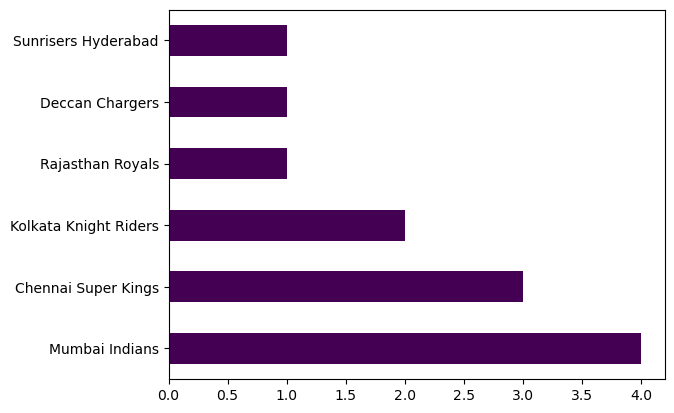

In [180]:
season_winner['winner'].value_counts().plot(kind='barh',colormap='viridis',

Text(0.5, 1.0, 'toss decision frequency')

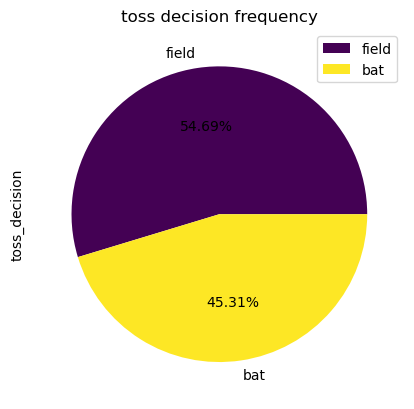

In [63]:
ipl['toss_decision'].value_counts().plot(kind='pie',colormap='viridis',autopct=lambda p:f'{p:.2f}%',legend=True)
plt.title('toss decision frequency')